# **Akos-Acoustic Weld Inspection Project Report**

Authors: 

1. "mnidgu2s- Mohammed Zaid Nidgundi"
2. "smoses2s- Swithinraj Moses Daniel"

## **1. Introduction**
---

Within the industrial sector, particularly in weld inspection, ensuring structural integrity is fundamental for safety and reliability. Traditional inspection methods are proven but are manual and time-consuming, may overlook subtle defects. As industries adopt automation and advanced technologies, there's a growing need for innovative inspection techniques. This project addresses this need by introducing an acoustic-based weld inspection system, enhanced by neural networks, aiming to ensure weld seam quality. Acoustic inspection, coupled with neural networks, offers an intriguing alternative that could provide real-time insights into the condition of weld seams.

The integration of neural networks into acoustic inspection not only opens avenues for automation but also promises a more nuanced understanding of intricate patterns present in weld seam sounds. The objective is to develop a system capable of autonomously identifying normal and abnormal audio patterns, providing a robust and reliable tool for weld inspection.

Moreover, we extend our sincere gratitude to Prof. Anastassia Kuestenmacher for her invaluable contribution in providing essential data for the successful execution of this project.

## **2. Solution Overview**
---

In this solution, our focus is on automating weld inspection in industrial settings using acoustic signals and neural networks.

### 2.1 Acoustic Inspection for Weld Quality
To address the challenges posed by traditional, time-consuming weld inspection methods, we turn to the richness of acoustic signals emitted during welding processes. These signals, often overlooked, carry intricate details about the integrity of weld seams. 

### 2.2 Integration of Advanced Signal Processing
Our approach involves harnessing advanced signal processing techniques such as Mel frequency cepstral co-efficient to extract meaningful information from these audio patterns. Unlike traditional visual inspection methods, this acoustic-centric approach offers a more refined understanding of weld quality. Because skilled welders can tell apart various welding conditions by listening, a filter stage was added using a mel-band filter bank. This filter bank attempts to mimic how the human ear responds to different frequencies. By using the mel-bands on the recorded sound data, we adjust to the human ear's ability to pick up important frequencies. The human ear responds non-linearly to different frequencies, making it better at distinguishing lower frequencies compared to higher ones.

### 2.3 Real-time Insights and Efficiency
An advantageous aspect of our solution lies in the potential for real-time insights. Acoustic signals are processed swiftly, and neural networks, optimized for efficient pattern recognition, can analyze these signals promptly. This not only expedites the inspection process but also facilitates timely interventions in cases of anomalies, contributing to enhanced efficiency in maintenance and quality control.


## **3.Introducing welding sound dataset**
---

Our exploration into the domain of weld seam inspection is directed by the creation of a custom autoencoder architecture, a fundamental element in our neural network ensemble. As a starting point, we can visually represent the waveforms of normal and abnormal signals side by side to gain insights into the provided data.

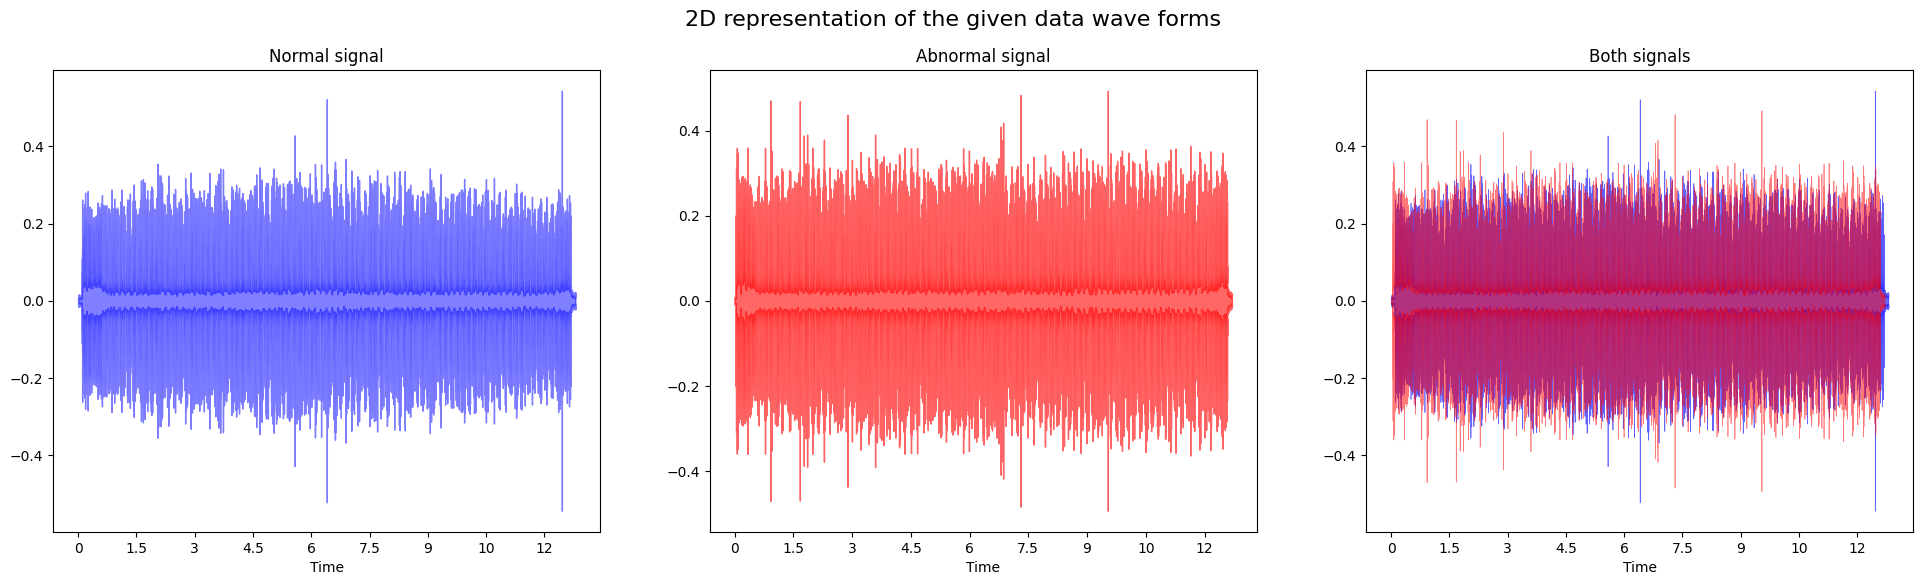

### 3.1 **Short Fourier Transform (STFT) Exploration**
In our initial study, we aim to understand the complex patterns present in both normal and abnormal weld seam sounds. Through the extraction of the Short Fourier Transform (STFT) for each signal, we expose the frequency decomposition, serving as the foundation for further analysis. The resulting graphical representation offers a visual understanding of the frequency amplitudes, laying the groundwork for more in-depth study.

```python
D_normal = np.abs(librosa.stft(normal_array[:n_fft], n_fft=n_fft, hop_length=hop_length))
D_abnormal = np.abs(librosa.stft(abnormal_array[:n_fft], n_fft=n_fft, hop_length=hop_length))

plot_after_stft(D_normal, D_abnormal)
```
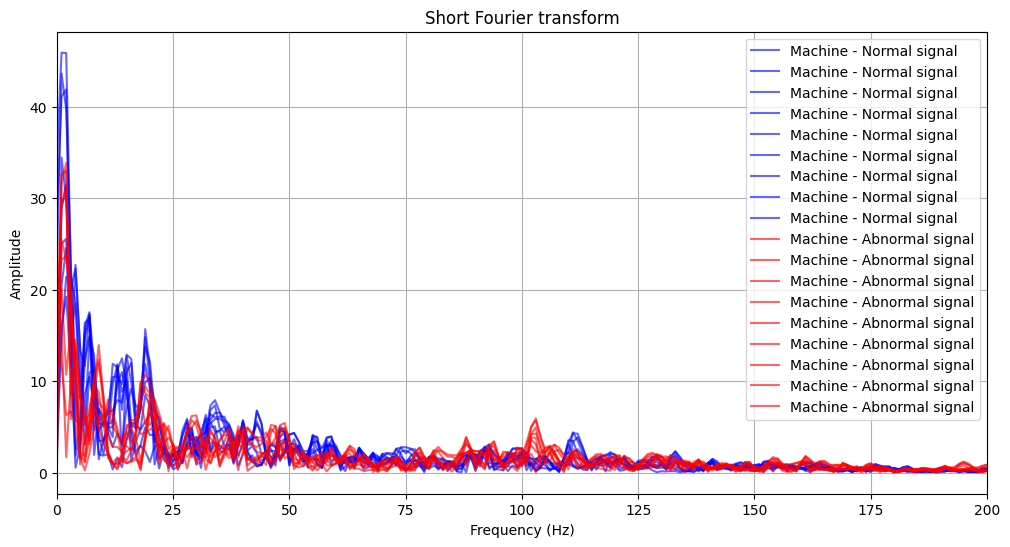


We can now discretize our temporal signals into the frequency domain, bringing us a step closer to visualizing them within this domain. For each signal, our next steps include:

1. **Preprocessing and Spectrogram Creation**: Discretize time signals using Short-Time Fourier Transform (STFT) and create spectrograms.

2. **Feature Extraction**: Extract feature (MFCC) from the dataset.

3. **Training Autoencoder for anomaly detection**: Utilize the extracted features of normal signal as input features for our neural network training.

4. **Model Testing**: Test Autoencoder on welding sound datasets to learn normal and abnormal acoustic patterns to give out reconstruction errors.

5. **Evaluation and Visualization**: Visualize reconstruction errors, and examine prediction distributions.

6. **Threshold Exploration**: Explore threshold ranges for classification decisions.

7. **CNN Training**: Train a Convolutional Neural Network (CNN) for binary classification of weld seams with pores and without pores.

8. **CNN Prediction**: Utilize the trained CNN to make predictions on new test data.

9. **Histogram Visualization**: Create histograms to depict the distribution of pores in data.


The picture below shows the frequency representation of the signals plotted earlier:



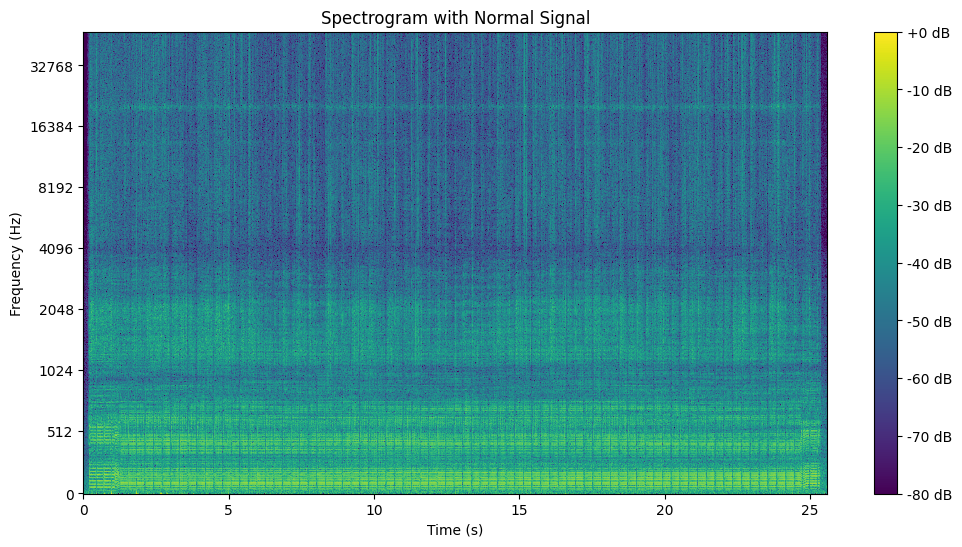
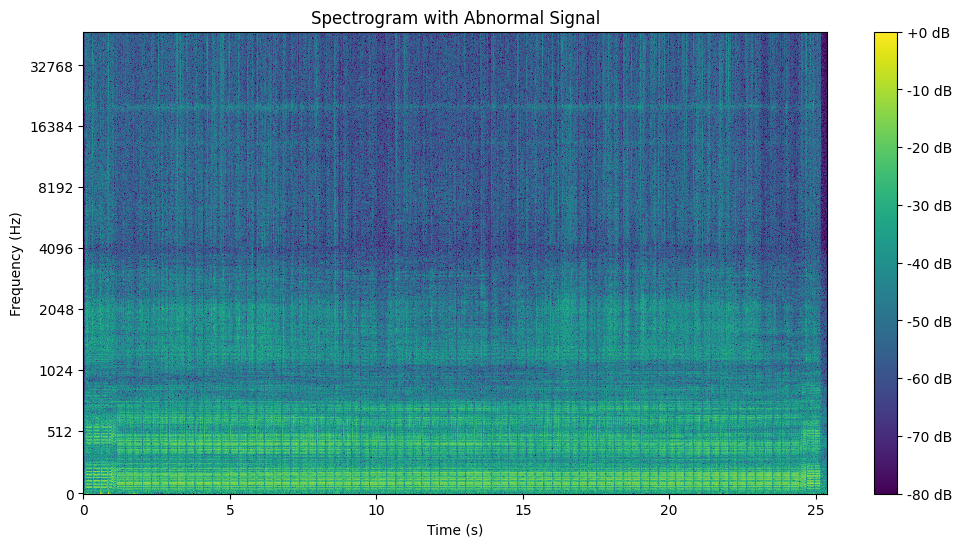
 

Now, we observe that these images exhibit good features but still they are not readily distinguishable to the human eye. Moving forward, we will construct a type of feature extractor derived from this analysis and integrate them into distinct architectures.



## **4. Building a Dataset**
---

Library called librosa is being used for understanding audio. With this library, we're visualising sounds of both normal and abnormal weld seams to extract features.

In this process, we've created a function named `extract_cepstral_coefficients`. This function considers various factors like how fast we collect samples (`sample rate`), the number of points used in analysis (`FFT points`), the time intervals between our analyses, and the number of characteristics we're looking for in the sound (`MFCCs`).

```python
def extract_cepstral_coefficients(filepath, sr, n_fft, hop_length, n_mfcc):
    signal_array = read_custom_i32(filepath)  
    mfcc = librosa.feature.mfcc(y=signal_array, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mfcc=n_mfcc)
    return mfcc
```

After processing the sound data, we get Mel-frequency cepstral coefficients (MFCCs), which are unique features capturing the essence of the weld seam sounds. We make sure to save these features in a pickle file.


## **5. Building an Autoencoder**
---

The encoder compresses the input data into a lower-dimensional representation, while the decoder reconstructs the original input from this compressed representation. The specific architecture is defined as follows:

```python
# The autoencoder model
input_layer = tf.keras.layers.Input(shape=(input_dim,))
encoded = tf.keras.layers.Dense(encoding_dim, activation='relu')(input_layer)
decoded = tf.keras.layers.Dense(input_dim, activation='sigmoid')(encoded)

autoencoder = tf.keras.Model(input_layer, decoded)
```

1. **Input Layer:** The network begins with an input layer shaped according to the dimensions of the input data.
2. **Encoder Layer:** A dense layer with a rectified linear unit (ReLU) activation function reduces the input dimensionality to the specified encoding dimension.
3. **Decoder Layer:** Another dense layer with a sigmoid activation function aims to reconstruct the original input dimension from the encoded representation.

### 5.1 Training the Autoencoder

The compiled autoencoder is trained using Mean Squared Error (MSE) as the loss function and the Adam optimizer. This training process involves presenting the training data (in this case, `train_X`) to the network for a specified number of epochs and adjusting the model's parameters to minimize the reconstruction error.

```python
# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
autoencoder.fit(train_X, train_X, epochs=30, batch_size=32)
```

1. **Compilation:** The model is configured for training with the Adam optimizer and MSE as the loss function.
2. **Training:** The autoencoder is trained on the provided training data (`train_X`) for 30 epochs, with a batch size of 32.

This training process results in an autoencoder that has learned a compact representation of the input data in its encoding layer. This compressed representation becomes crucial for subsequent steps, especially in the context of anomaly detection where deviations from normal patterns are identified.

## **6. Training and Visualizing Reconstruction Errors**
---

In this part of training and visualizing reconstruction errors, the goal is to evaluate how well the autoencoder has learned to reconstruct the input data. This process involves shuffling the indices, preparing the necessary data for visualization, and creating a histogram to analyze the distribution of reconstruction errors.

### 6.1 Shuffling Indices

Before visualizing the reconstruction errors, the indices of the data are shuffled to ensure that the subsequent analysis is not biased by the order of the samples. Shuffling helps in creating a more representative distribution for further evaluation.

### 6.2 Data Preparation

The true labels and the corresponding reconstruction errors are shuffled based on the shuffled indices. This creates a dataset containing the indices and shuffled reconstruction errors. The appropriate bin width for the histogram is calculated based on the range of shuffled reconstruction errors.

### 6.3 Histogram Creation

The histogram is divided into bins, with each bin representing a range of reconstruction errors. The resulting visualization provides insights into how well the autoencoder distinguishes between normal and abnormal signals based on their reconstruction errors.

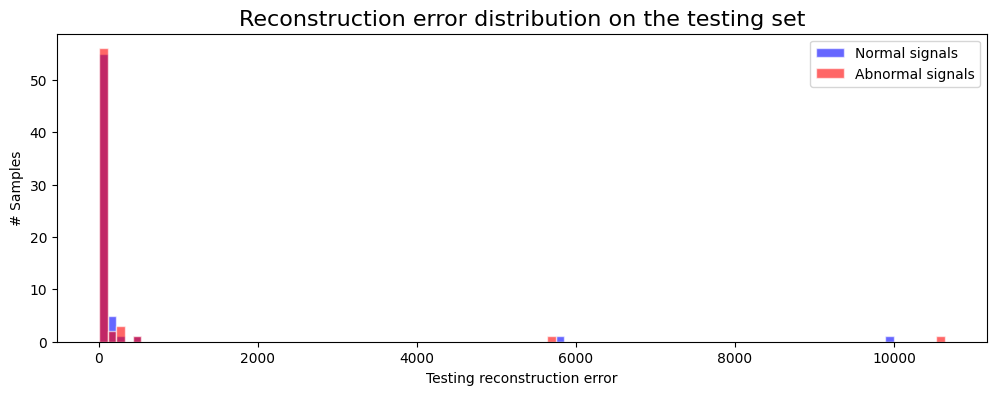

We set threshold ranges for exploring normal and abnormal signals. It utilizes scatter plots to visualize the distribution of normal and abnormal signals based on specified thresholds. The x-axis represents the samples, while the y-axis corresponds to the reconstruction error. The code also incorporates a threshold range (shaded in orange) with defined minimum and maximum values.

In the plot shown below, normal and abnormal signals are differentiated, and the threshold range is highlighted, providing a clear visual representation of the exploration process. This analysis aids in understanding the distribution of signals and determining an appropriate threshold for identifying abnormal patterns based on reconstrustion errors.

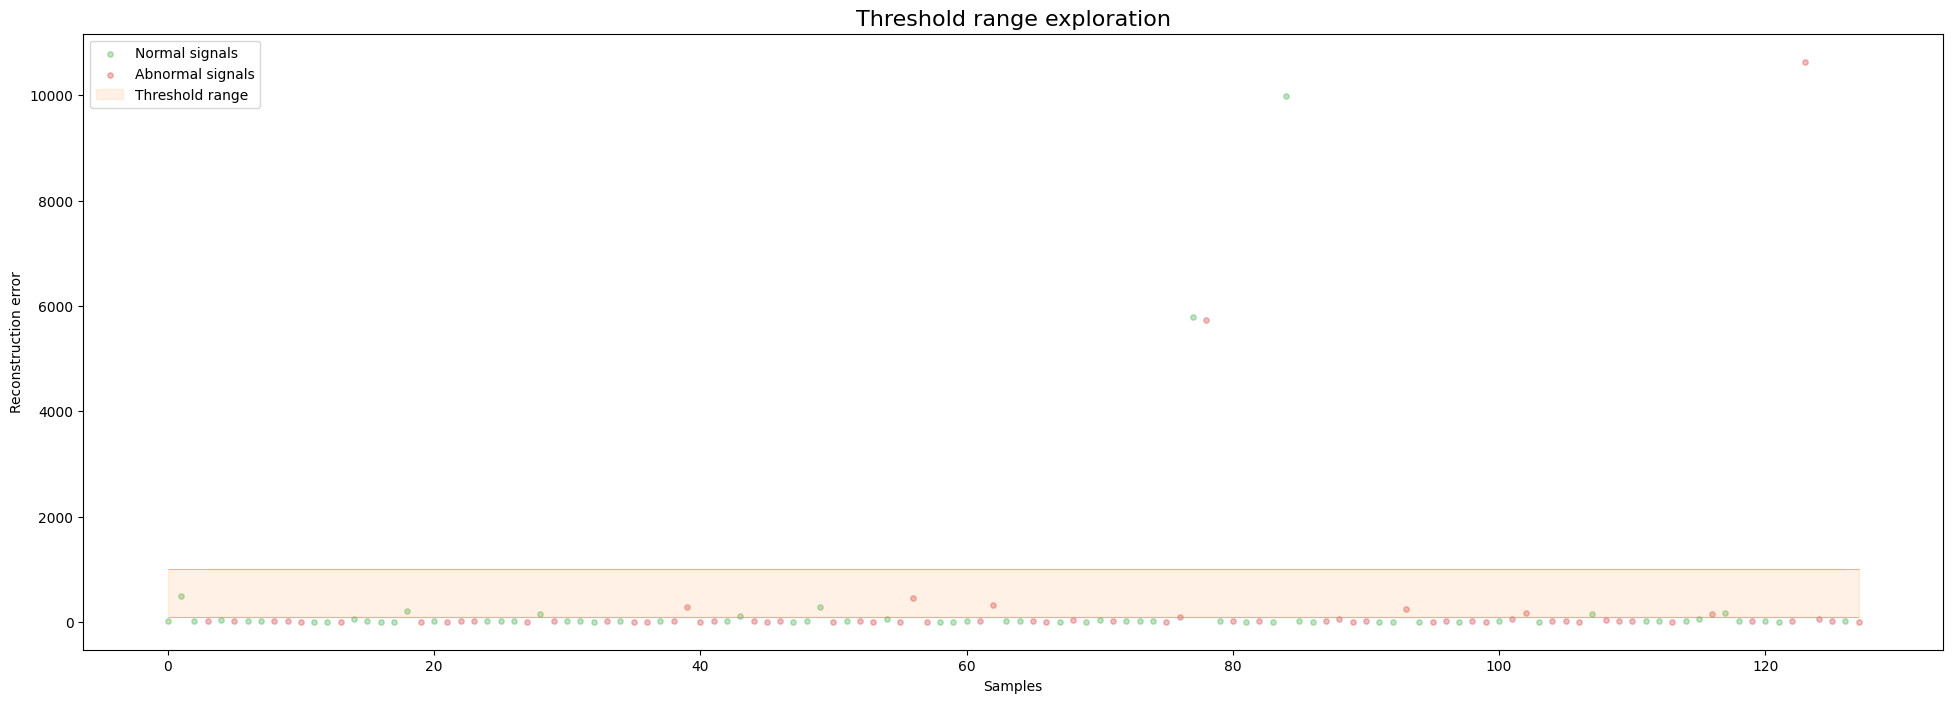


## **7. Creating Dataset for Training CNN**
---

In this step, a dataset is created for training the Convolutional Neural Network (CNN). The focus is on mapping the reconstruction errors to the original MFCC (Mel-Frequency Cepstral Coefficients) data. This mapping is essential for associating the learned errors with the input features, allowing the CNN to learn patterns from both normal and abnormal sound signals.

1. **Load Testing Datasets:** Two testing datasets are loaded—one with pores and one without pores. The reconstruction errors are separately calculated for both datasets.

2. **Generate Labels:** Labels are generated for both datasets, with normal data labeled as 0 and abnormal data labeled as 1.

3. **Combine Labels and Errors:** Labels and reconstruction errors from both datasets are concatenated to create the combined test labels and combined reconstruction errors. This ensures that the CNN is trained on a diverse set of samples.

4. **Prepare Feature Set for Training:** The original MFCC data from both datasets are combined based on reconstrustion errors and the labels to form the feature set for CNN training.

## **8. Building a CNN**
---

### 8.1 CNN Architecture for Training

The CNN is designed to learn intricate patterns and features directly from the MFCC data. It provides an overview of the CNN architecture, specifying the type of CNN, the number of layers, and the activation functions employed.

### 8.2 CNN Architecture Overview
```python

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(test_data_combined_shuffled.shape[1],)),  
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  
])
```


1. **Input Layer:** The initial layer is a Dense layer with 32 neurons and ReLU activation. It acts as the entry point for the input data, with the input shape determined by the dimensions of the reshaped feature set.

2. **Hidden Layer:** A second Dense layer follows with 64 neurons and ReLU activation. This layer aids in capturing higher-level representations of the input features, contributing to the network's ability to distinguish complex patterns.

3. **Output Layer:** The final layer is a Dense layer with a single neuron and Sigmoid activation. This layer serves as the output layer for binary classification, producing a probability score indicating the likelihood of an anomaly.

### 8.3 Model Compilation and Training

```python

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the CNN model
model.fit(test_data_combined_shuffled, y_true, epochs=100, batch_size=34, validation_split=0.2)

```

The model is compiled using the Adam optimizer and binary crossentropy loss function, suitable for binary classification tasks. The accuracy metric is monitored during training to assess the model's performance.

The training process involves fitting the CNN to the combined and shuffled feature set, with labels representing normal and abnormal sound signals. The training is conducted over 100 epochs, with a batch size of 34 and a validation split of 20% to evaluate the model's generalization on unseen data.

## **9. Making Predictions with the CNN and Visualizing the Pores in Test Data**
---

The process of making predictions with the trained CNN involves loading the previously saved model and applying it to test data containing sound signals with pores and without pores.

### 9.1 Loading the Trained CNN Model

The first step is to load the CNN model, which has been trained on the combined dataset containing both normal and abnormal sound signals. The trained model is loaded into memory for making predictions on the test data.

### 9.2 Preprocessing Test Data

The test data, stored in a pickled file, is loaded and preprocessed to align with the CNN's input expectations. The MFCC arrays in the test data are flattened and reshaped to ensure compatibility with the CNN's input layer.

### 9.3 Making Predictions

The reshaped test data is then fed into the CNN to obtain predictions for each instance. These predictions represent the model's assessment of whether a given sound signal contains anomalies related to pores.

### 9.4 Visualizing the Pores in Test Data

The objective is not only to make predictions but also to gain a visual understanding of the identified anomalies. By examining the predictions and comparing them to the ground truth, insights into the CNN's performance can be derived. This involves visualizing the distribution of predictions and understanding how well the model distinguishes between normal and abnormal sound signals.

#### **Tested with data having pores**

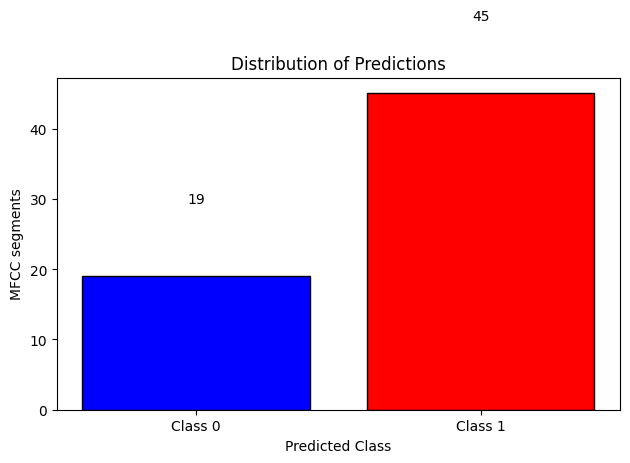

#### **Tested with data having no pores**

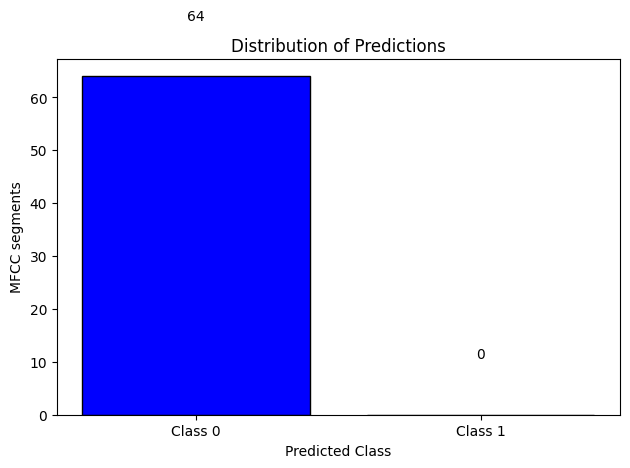

## **10. References**
---

1. **Journal Paper:**
   - Rohe, M., Stoll, B. N., Hildebrand, J., Reimann, J., & Bergmann, J. P. (2021). Detecting Process Anomalies in the GMAW Process by Acoustic Sensing with a Convolutional Neural Network (CNN) for Classification. *Journal of Manufacturing and Materials Processing*, 5(4), 135. https://doi.org/10.3390/jmmp5040135

2. **GitHub Repository:**
   - AWS Samples. Performing anomaly detection on industrial equipment using audio signals. Retrieved from https://github.com/aws-samples/sound-anomaly-detection-for-manufacturing/tree/main
